In [1]:
#you are running the lab in your  browser, so we will install the libraries using ``piplite``
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['seaborn'])
await piplite.install(['scikit-learn'])


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
#This function will download the dataset into your browser 

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [5]:
#you will need to download the dataset; if you are running locally, please comment out the following 
await download(path, "auto.csv")
path="auto.csv"

Load the data and store it in dataframe `df`:


In [6]:
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lm = LinearRegression()
lm

LinearRegression()

In [9]:
X = df[['highway-mpg']]
Y = df['price']

In [10]:
lm.fit(X,Y)

LinearRegression()

In [11]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [12]:
lm.intercept_

38423.30585815743

In [13]:
lm.coef_

array([-821.73337832])

In [14]:
# Ejercicio 1
# Create a linear regression object called "lm1".
lm1 = LinearRegression()
lm1

LinearRegression()

In [16]:
# Ejercicio 2
# Train the model using "engine-size" as the independent variable and "price" as the dependent variable?
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

<h4>Slope</h4>


In [17]:
# Ejercicio 3
# Train the model using "engine-size" as the independent variable and "price" as the dependent variable?
lm1.coef_

array([[166.86001569]])

In [ ]:
# Ejercicio 4
lm1.intercept_

In [ ]:
# Ejercicio 5
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

In [18]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [19]:
lm.fit(Z, df['price'])

LinearRegression()

In [20]:
lm.intercept_

-15806.62462632922

In [21]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [22]:
# Ejercicio 6
# Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", 
# and the predictor variable is "normalized-losses" and "highway-mpg".
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

In [23]:
# Ejercicio 7
# Find the coefficient of the model.
lm2.coef_

array([   1.49789586, -820.45434016])

In [24]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

(0.0, 48175.982710699725)

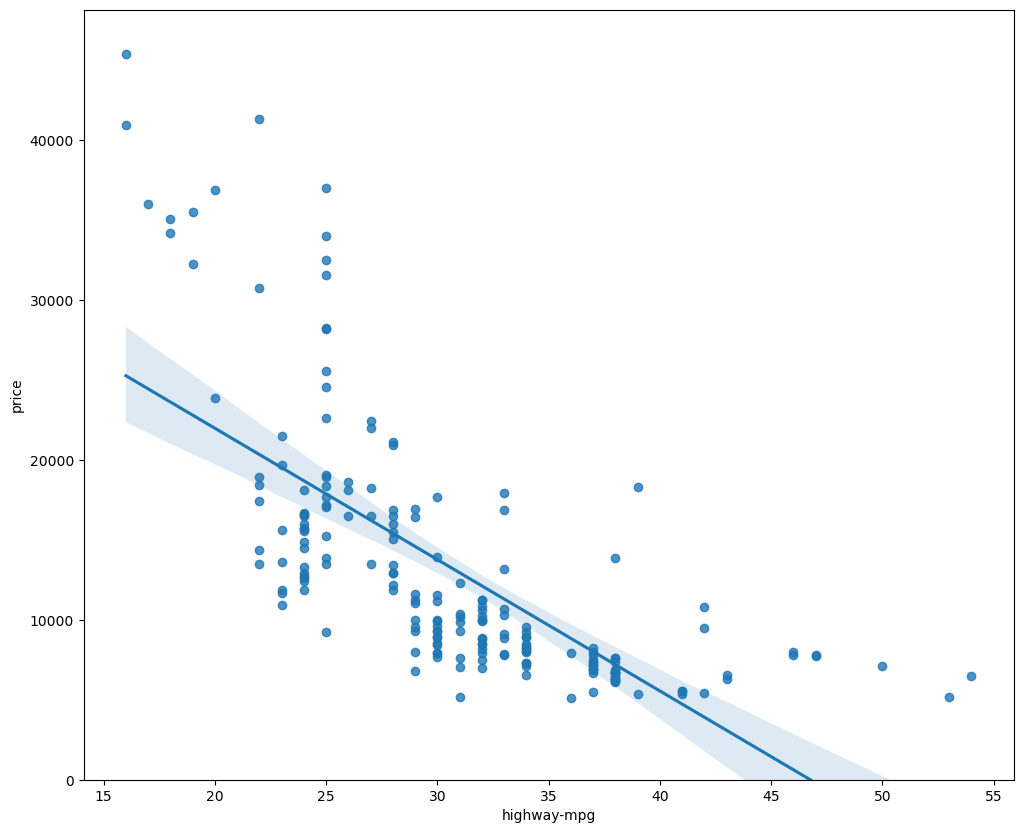

In [25]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

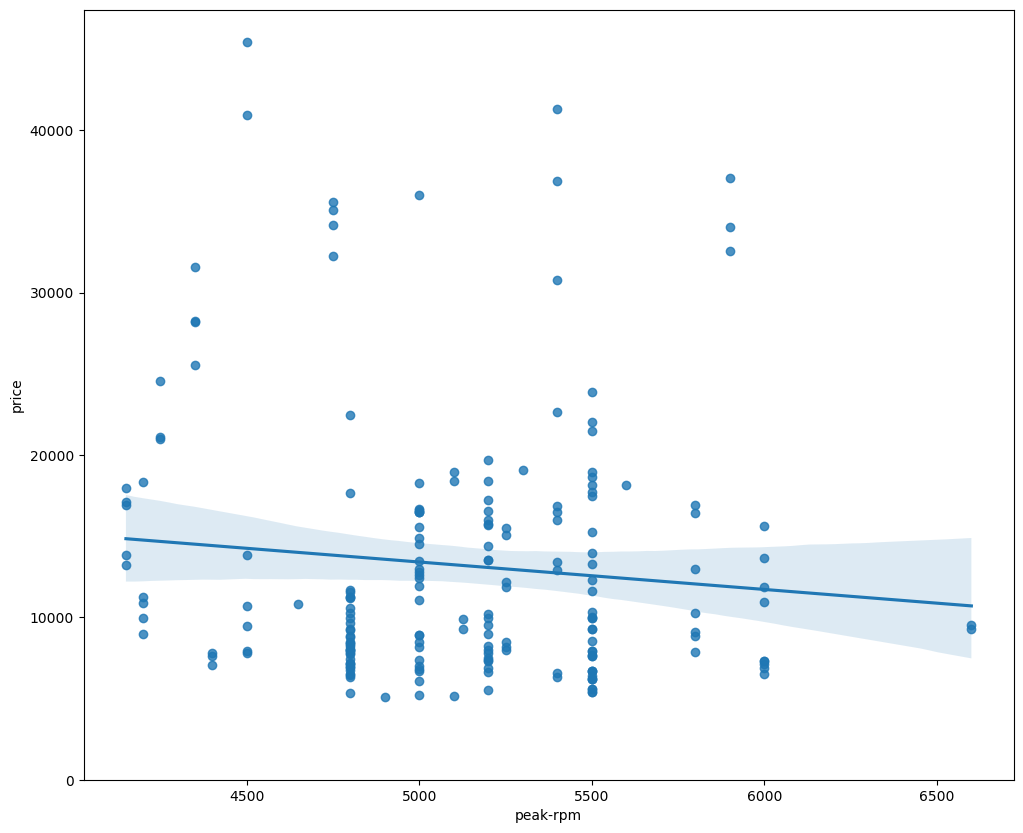

In [26]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [27]:
# Ejercicio 8
# Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? 
# Use the method ".corr()" to verify your answer.
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


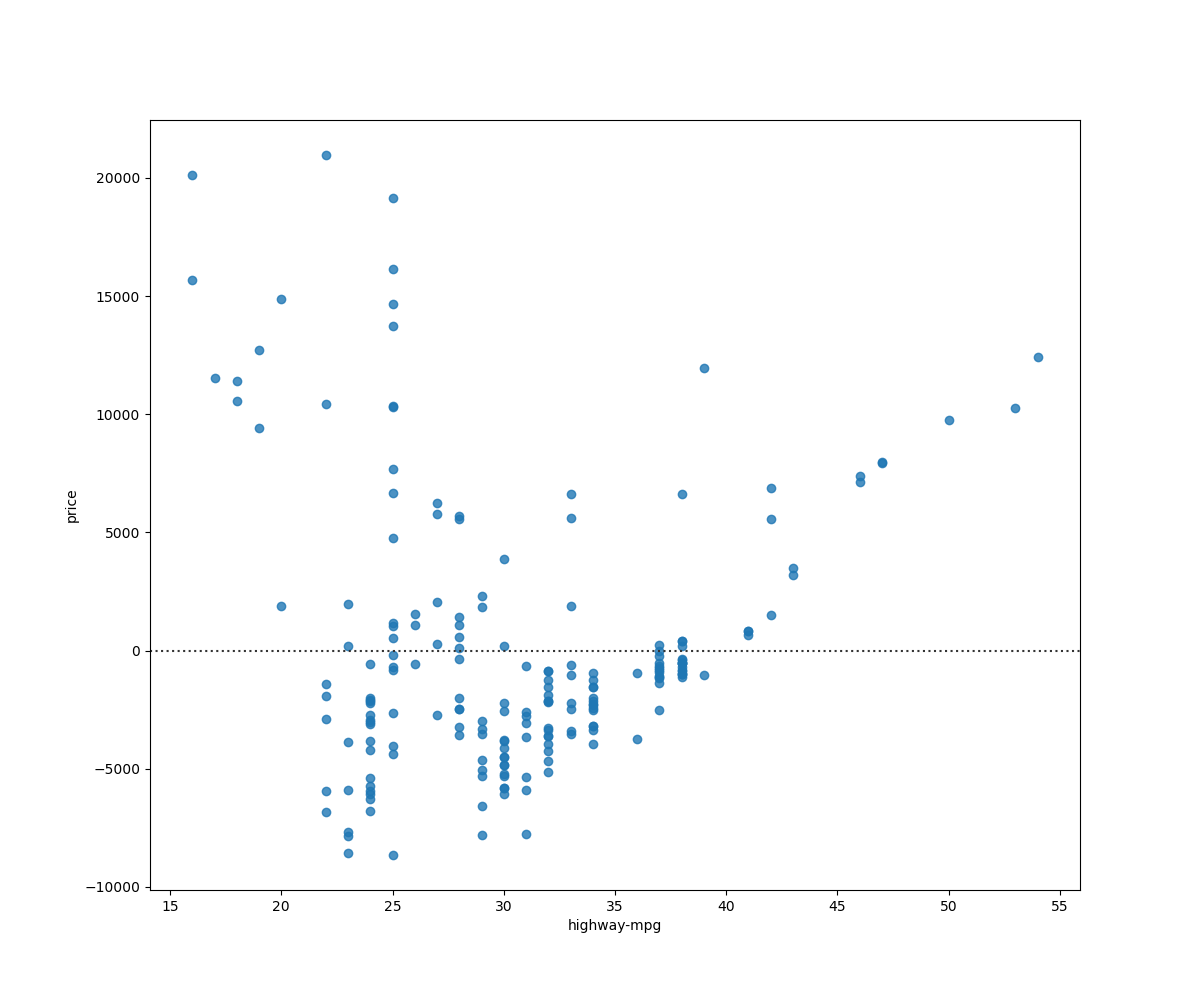

<Figure size 1200x1000 with 0 Axes>

In [28]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

In [29]:
Y_hat = lm.predict(Z)


<ipython-input-30-7377bca648c1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
<ipython-input-30-7377bca648c1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" 

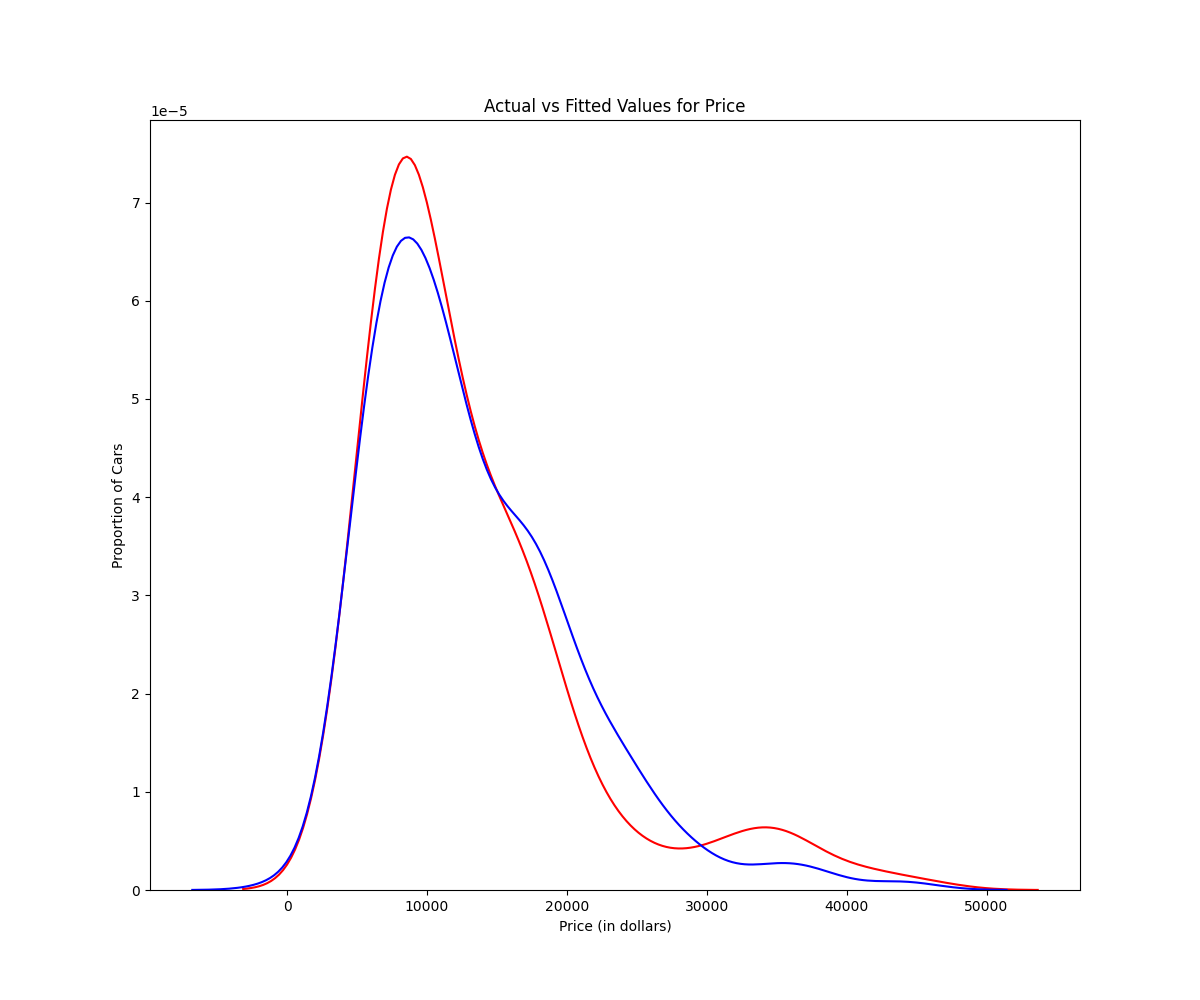

In [30]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [31]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [32]:
x = df['highway-mpg']
y = df['price']

In [ ]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


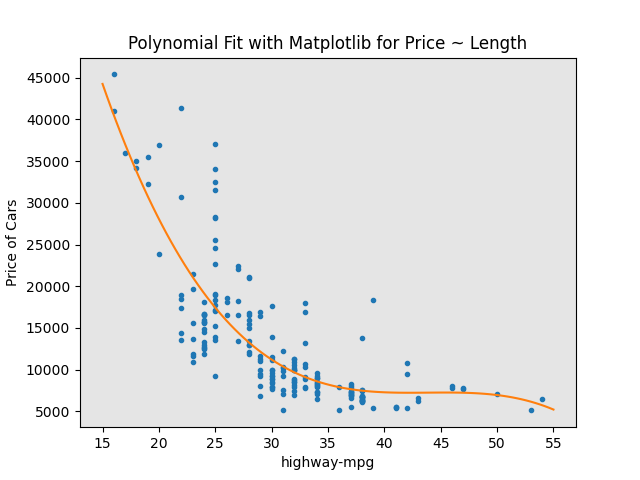

In [34]:
PlotPolly(p, x, y, 'highway-mpg')

In [35]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


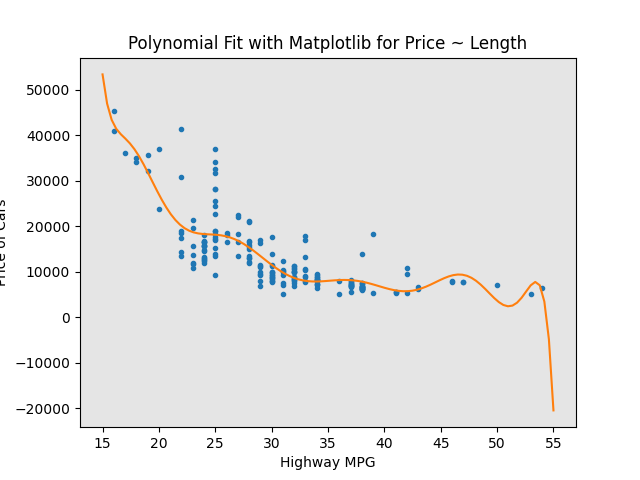

In [36]:
# Ejercicio 9
# Create 11 order polynomial model with the variables x and y from above.
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [39]:
Z_pr=pr.fit_transform(Z)

In [40]:
Z.shape

(201, 4)

In [41]:
Z_pr.shape

(201, 15)

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [43]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [44]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [45]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [46]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [47]:
# Ejercicio 10
# Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the 
# features Z and target y.
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [48]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [49]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [52]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [53]:
Y_predict_multifit = lm.predict(Z)

In [54]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [55]:
from sklearn.metrics import r2_score

In [56]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [57]:
mean_squared_error(df['price'], p(x))

20474146.426361218

In [58]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [59]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [60]:
lm.fit(X, Y)
lm

LinearRegression()

In [61]:
yhat=lm.predict(new_input)
yhat[0:5]

/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

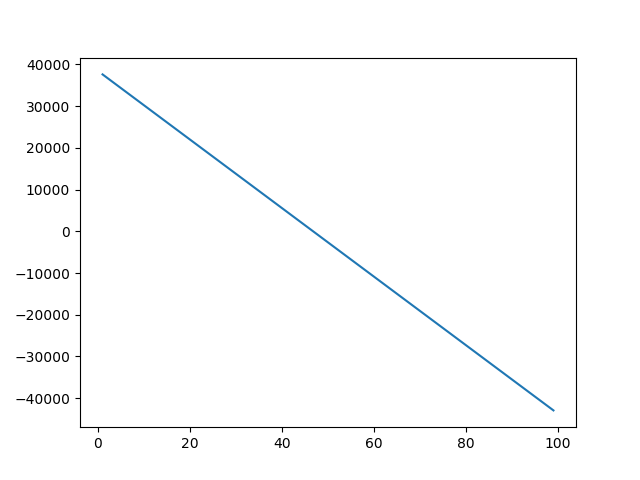

<Figure size 640x480 with 0 Axes>

In [62]:
plt.plot(new_input, yhat)
plt.show()